# 爬取北京地铁站信息

In [1]:
import re
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content.decode('utf8'), 'lxml') # 也可写'html_parse

In [3]:
from collections import defaultdict

In [4]:
page_list = defaultdict(list)
for i in soup.find_all('a', {'target':'_blank'}):
    temp = re.findall('^北京地铁[\w|\d]+线', str(i.string))
    if temp != []:
        if str(i.string) not in page_list.keys():
            page_list[str(i.string)] = str(i['href'])
        else:
            continue

In [5]:
page_list

defaultdict(list,
            {'北京地铁1号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
             '北京地铁13号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
             '北京地铁八通线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
             '北京地铁5号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
             '北京地铁8号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
             '北京地铁10号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
             '北京地铁机场线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
             '北京地铁4号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
             '北京地铁15号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
             '北京地铁昌平线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
             '北京地铁大兴线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%

In [6]:
for i in page_list.keys():
    page_list[i] = 'https://baike.baidu.com' + page_list[i]

### 因为‘s1’，燕房，9号，16（~），亦庄，‘西郊’这些线路网站不具一般性，切没有距离，所以去不爬取这些线路

In [7]:
page_list

defaultdict(list,
            {'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
             '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
             '北京地铁八通线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
             '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
             '北京地铁8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
             '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
             '北京地铁机场线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
             '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
             '北京地铁15号线': 'https://baike.baidu.com/item/%E5%8C%97%E

In [8]:
from icecream import ic

In [9]:
from collections import defaultdict

In [11]:
f_stations = []
f_distances = []
# len_s = len(f_stations)
# len_d = len(f_distances)
nodes_line = defaultdict()
for i in page_list.keys():
    tmp_url = page_list[i]
    tmp_response = requests.get(tmp_url, headers=headers)
    tmp_soup = BeautifulSoup(tmp_response.content.decode('utf8'), 'lxml')
    
    print('now is in{}'.format(i))
    
    if i == '北京地铁16号线':
        for j in tmp_soup.find_all('b', text='站区间'):
            for k in j.parent.parent.find_next_siblings():
                if k.contents[0].string:
                    f_stations += re.findall('(.*?)～(.*)', k.contents[0].string)
                    f_stations += re.findall('(.*?)~(.*)', k.contents[0].string)
                    f_distances += [float(k.contents[1].string) * 1000]
        continue
    for j in tmp_soup.find_all('th', text='起始/终到车站'):
        for k in j.parent.find_next_siblings():
            if k.contents[0].string:
                f_stations += re.findall('(.*?)——(.*)', k.contents[0].string)
                if k.contents[1].string[-2] == '千':
                    f_distances += [float(k.contents[1].string[:-2]) * 1000]
                else:
                    f_distances += re.findall('\d+', k.contents[1].string)
# for i, v in f_stations:
#     f_stations_connections[i] = v
#     print(f_stations)
#     print(f_distances)
#     len_s = len(f_stations)
#     len_d = len(f_distances)
#     ic(len_s)
#     ic(len_d)


now is in北京地铁1号线
now is in北京地铁13号线
now is in北京地铁八通线
now is in北京地铁5号线
now is in北京地铁8号线
now is in北京地铁10号线
now is in北京地铁机场线
now is in北京地铁4号线
now is in北京地铁15号线
now is in北京地铁昌平线
now is in北京地铁大兴线
now is in北京地铁房山线
now is in北京地铁亦庄线
now is in北京地铁9号线
now is in北京地铁6号线
now is in北京地铁14号线
now is in北京地铁7号线
now is in北京地铁16号线
now is in北京地铁西郊线
now is in北京地铁S1线
now is in北京地铁燕房线
now is in北京地铁2号线


In [12]:
f_stations_connections = defaultdict(list)
for i, v in f_stations:
    f_stations_connections[i].append(v)
    f_stations_connections[v].append(i)
len(f_stations_connections)
f_stations_connections

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['大钟寺', '动物园', '新街口', '

In [13]:
import networkx as nx

In [14]:
f_stations_connections_graph = nx.Graph(f_stations_connections)

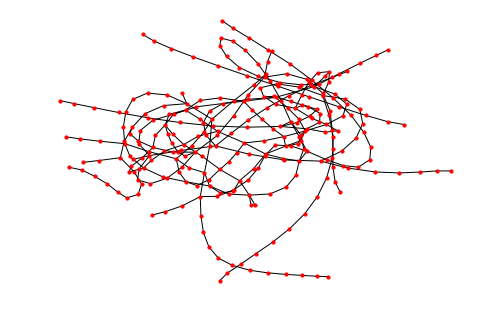

In [61]:
nx.draw(f_stations_connections_graph, with_labls=True, node_size=10)

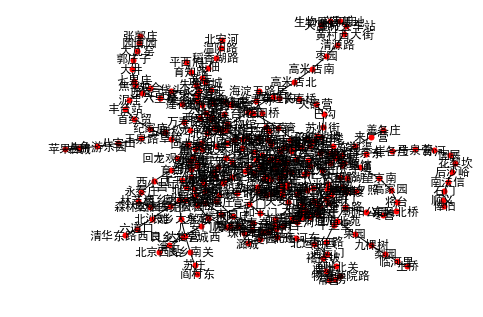

In [50]:
gg = nx.Graph()
for i, v in f_stations:
    gg.add_edge(i, v)
nx.draw(gg,with_labels=True, node_size=25)

In [ ]:
def search(f_stations_connections,f)